**I made clustering in the weekly sales transactions dataset.**

**with Clustering and PCA**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [76]:
data = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv",index_col="Product_Code")

In [77]:
data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
Product_Code,,,,,,,,,,,,,,,,,,,,,
P1,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
P2,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
P3,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
P4,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
P5,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, P1 to P819
Columns: 106 entries, W0 to Normalized 51
dtypes: float64(52), int64(54)
memory usage: 677.9+ KB


In [79]:
data.isna().sum().sum()

0

In [80]:
data.drop_duplicates(inplace=True)

In [81]:
from sklearn.cluster import KMeans

In [83]:
X= data.values

In [84]:
X

array([[11.  , 12.  , 10.  , ...,  0.17,  0.11,  0.39],
       [ 7.  ,  6.  ,  3.  , ...,  0.1 ,  0.6 ,  0.  ],
       [ 7.  , 11.  ,  8.  , ...,  0.45,  0.45,  0.36],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.75],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.33]])

In [127]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
X_centered = X - X.mean(axis=0)

In [128]:
pca.fit(X_centered)

X_pca = pca.transform(X_centered)
X_pca

array([[  6.08111348,  -7.30159902,   1.96288235, ...,  -7.48111254,
          3.25167433,   0.52739813],
       [-36.47655908,  -4.09084858,   2.74624   , ...,   4.62545076,
         -1.55468041,   4.38321119],
       [ -2.31328588,  -2.18073027,  -2.71028246, ...,  -0.73916363,
          6.06293533,   0.39843302],
       ...,
       [-62.28059177,  -1.36364481,  -0.28981194, ...,   0.81167573,
         -0.16536211,   1.34081465],
       [-63.87519458,  -2.69743009,  -0.67398249, ...,   0.17212836,
          0.15132608,  -0.63572774],
       [-63.75705965,  -3.8783763 ,  -0.29255732, ...,   1.08184922,
         -1.19548391,   0.36085157]])

In [134]:
a = 1
for i in pca.explained_variance_ratio_:
    print(f"{a}. Feature = %{i*100}")
    a+=1
# I could use just number one feature!

1. Feature = %92.45194611856633
2. Feature = %0.8343376658620048
3. Feature = %0.2736943470024279
4. Feature = %0.24526554487607194
5. Feature = %0.24142809361242606
6. Feature = %0.23192565269403642
7. Feature = %0.22777524304183155
8. Feature = %0.2217098749047355
9. Feature = %0.21218454979354695
10. Feature = %0.20384819582861852


In [129]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 58).fit(X_pca)

In [130]:
k_means.cluster_centers_

array([[-3.87330980e+01,  9.56662198e-01, -3.60684724e-01,
        -5.45196505e-02,  1.60546524e-01, -8.82305209e-03,
         3.47032835e-01,  1.51420749e-01,  2.39860710e-01,
         4.70477276e-02],
       [ 1.83909079e+02, -5.29325652e+00, -3.08609568e-01,
         3.64993592e-01,  1.49733966e-01,  6.73514746e-01,
        -1.79736506e-01,  3.05799734e-01,  6.05656873e-01,
        -1.69920817e-01],
       [ 7.77963319e+00,  3.86507205e+00,  2.38947222e-01,
        -4.53842632e-01, -3.89683493e-01, -8.23903798e-01,
         4.82379631e-02, -9.31886582e-01, -8.86619391e-01,
        -1.77065997e-02],
       [-6.31987810e+01, -2.93296972e+00, -3.00093802e-02,
         2.67323076e-01,  4.46992855e-02,  4.63354178e-01,
        -2.44650957e-01,  3.28673262e-01,  2.86892430e-01,
        -5.13903967e-02],
       [ 6.85587110e+01,  1.64031979e+01,  1.70286539e+00,
        -9.66259004e-01, -1.90973713e-02, -2.01260011e+00,
         5.04126101e-01, -4.23290827e-01, -1.46892282e+00,
         6.

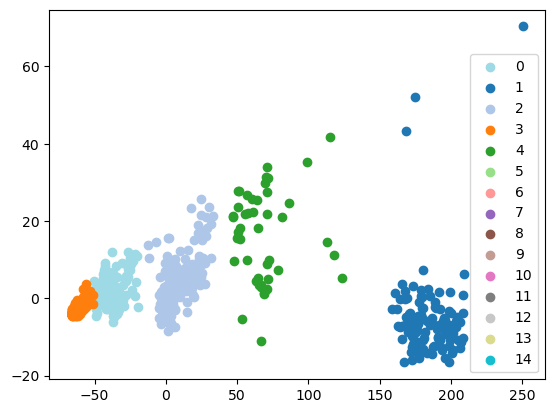

In [131]:
y = k_means.labels_

colors = ['r', 'g', 'b', 'c', 'm']

labels = np.unique(labels)
colors = [plt.cm.tab20(i/float(len(labels)-1)) for i in range(len(labels))]
c = [colors[labels[i]-1] for i in range(len(labels))]

fig, ax = plt.subplots()
for i in range(len(labels)):
    ax.scatter(X_pca[y==labels[i], 0], X_pca[y==labels[i], 1], c=c[i], label=labels[i])
ax.legend()
plt.show()